In [1]:
#### Dependencies ####
#### Import Comet for experiment tracking and visual tools
from comet_ml import Experiment
####
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
/usr/local/lib/python3.6/dist-packages/numba/core/errors.py:144: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Using TensorFlow backend.


**Want to eventually experiment with Mel-scale spectrograms on audio samples that have been summed**
The discriminator network will take a spectrogram and determine whether it was audio or noise
We want to feed it mel-scale spectrograms specifically since those better capture human-scale hearing

In [1]:
# experiment = Experiment(api_key="wPsWaajXsaFzxcacTRTZ2iGEr",
#                         project_name="urbansound8k")

from audio_dataset import *
from common_audio import *
urban_sound = AudioDataSet('./../UrbanSound8K/audio', sr=8000, duration=5.0)

/usr/local/lib/python3.6/dist-packages/numba/core/errors.py:144: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


test


In [2]:
y = urban_sound.load([9])
play_audio(y, urban_sound.sr)

[[3.98357928e-01 2.60685146e-01 5.42774141e-01 ... 1.23663282e+00
  9.39488053e-01 3.12505913e+00]
 [1.25002778e+00 1.88629127e+00 2.73452640e+00 ... 1.62144884e-01
  2.73961401e+00 4.58444309e+00]
 [7.87242830e-01 3.60648298e+00 5.67897034e+00 ... 2.87695265e+00
  4.05365229e+00 4.81318855e+00]
 ...
 [9.17389989e-02 4.59105596e-02 3.06181493e-04 ... 1.65669582e-04
  3.83702968e-03 7.69669237e-03]
 [9.14612412e-02 4.56294082e-02 2.18884903e-04 ... 1.57067552e-04
  3.98843223e-03 7.70568475e-03]
 [9.14672911e-02 4.58129011e-02 1.55530124e-05 ... 1.03698934e-04
  3.99148418e-03 7.79273221e-03]]


/usr/local/lib/python3.6/dist-packages/librosa/display.py:725: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


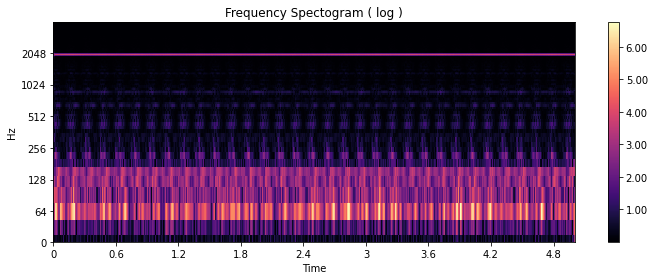

In [4]:
y_sound = urban_sound.load([9])[0]
sr = urban_sound.sr
duration = urban_sound.duration
y_tone = generate_tone(sr, duration, np.array([2000]), np.array([0.06]))[0]
play_audio(y_tone, urban_sound.sr)
y = y_sound + y_tone
play_audio(y, sr)

spectrogram = audio_to_spectrogram(np.array([y]), sr, mel=False)

print(np.abs(spectrogram[0]))

show_spectrogram(spectrogram[0], sr, y_axis='log')

plt.show()
play_audio(spectrogram_to_audio(spectrogram, sr, mel=False), sr)

# spectrogram[48:51, :] = -1.

# show_spectrogram(spectrogram, sr)
# plt.show()
# play_audio(spectrogram_to_audio(spectrogram, sr), sr)